In [20]:
import Supernovae_class as Svae

Let's have a simple example, where there is a hiden $\alpha$ parameter that regulates the frequency of a time-series. There is also a parameter $\beta$ which is a noise term.

$Y = sin(\alpha x+\beta)$ 

In [21]:
import numpy as np
example = np.zeros((60,60))

In [22]:
np.random.seed(1)
strip = np.ones((20,60))
rand = np.random.rand(3)
strips = [rand[i] * strip for i in range(0,3)]
pattern = np.concatenate(strips, axis = 0)
pattern.shape

(60, 60)

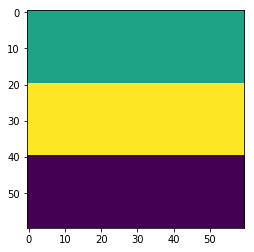

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(pattern)

In [41]:
time_size = 696

import math
x =  np.arange(time_size)
world = np.zeros((60,60,time_size))
random_offset = np.random.rand((60*60)).reshape(60,60)
for lon in range(60):
    for lat in range(60):
        a = pattern[lon, lat]
        b = random_offset[lon, lat]*20
        world[lon, lat] = np.sin(a*x+b)

(60, 60, 696)

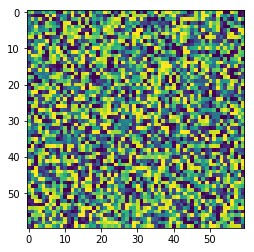

In [42]:
plt.imshow(world[:,:, 60])
world.shape

In [43]:
supernovae_1 = Svae.supernovae()

Configuration file found


In [44]:
# If there is no config file we must create one
supernovae_1.create_conf_file( Name_model = "World_toy_Example",
                             Description = "This is an example of use of SupernoVAE",
                             Network_folder = "World_test_main_folder",
                             Name_datafile = "World_toy",
                             Verbosity = "Information",
                             Theta = 0.1,
                             Time_size = 696,
                             Max_lat = 60,
                             Max_lon = 60)


In [45]:
# We load again the package once the config file has been created
import Supernovae_class as Svae

In [46]:
supernovae_1.save_data_tf(world)

The dataset has been saved in TF format


### Training the model
Once the Svae object is created, the data is stored in Tensorflow format in the folder: 'Network_folder/input_data/' this is done by the function `save_data_tf()`.

Then, the model can be trained with the function of the `train_svae()`. At the end of the training Tensorflow will print the result of the loss function. This is desirable to be as small as possible, and indicate us if the training `N_steps` is enought.

In [47]:
supernovae_1.train_svae(N_steps= 10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_device_fn': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_session_config': None, '_train_distribute': None, '_tf_random_seed': None, '_is_chief': True, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0a1012a438>, '_model_dir': 'World_test_main_folder/model/', '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_task_id': 0, '_num_worker_replicas': 1, '_master': ''}
INFO:tensorflow:Skipping training since max_steps has already saved.


Once the model is trained we can compute the embeddings for each time-series. These will be stored in a the folder `network_folder/output`. Given that the trained model is stored, this action can be done in a diferent session. Remember that the process of predicting embeddings will scale linearly with the number of time series: it may take quite a while (sometimes even more than training).

In [48]:
supernovae_1.tf.logging.set_verbosity(supernovae_1.tf.logging.DEBUG)
supernovae_1.predict()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_device_fn': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_session_config': None, '_train_distribute': None, '_tf_random_seed': None, '_is_chief': True, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0a150c2fd0>, '_model_dir': 'World_test_main_folder/model/', '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_task_type': 'worker', '_task_id': 0, '_num_worker_replicas': 1, '_master': ''}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-21-08:17:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from World_test_main_folder/model/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensor

Total predictions computed: 3600


In [49]:
supernovae_1.load_predictions()

3600/3600:33.97%
Predictions loaded ...


In [50]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(supernovae_1.embeddings.transpose())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

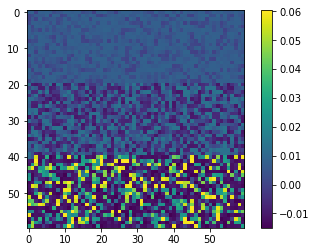

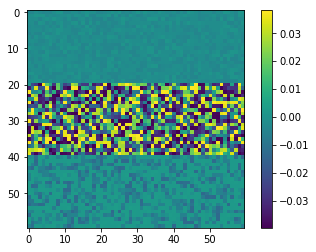

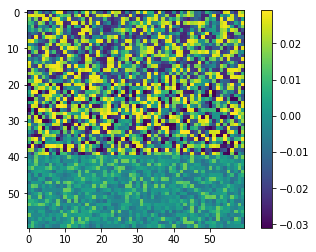

In [51]:
for i in range(3):
    plt.imshow(pca.components_[i].reshape(60,60))
    plt.colorbar()
    plt.show()